In [1]:
import pandas as pd
import numpy as np
import math
df = pd.read_csv("Assignment_2.csv")

In [2]:
def mean(df):
    return df.mean()

print(mean(df))

Roll No.    40.5000
Subj1       46.6875
Subj2       48.3625
Subj3       48.0500
Subj4       50.8250
Subj5       47.6000
dtype: float64


In [3]:
def median(df):
    return df.median()

print(median(df))

Roll No.    40.5
Subj1       41.0
Subj2       49.0
Subj3       49.0
Subj4       51.0
Subj5       46.5
dtype: float64


In [4]:
for col in df.columns:
    mode_value = df[col].mode().tolist()
    print("Mode of", col, "=", mode_value)

Mode of Roll No. = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
Mode of Subj1 = [33, 47]
Mode of Subj2 = [20, 69, 70]
Mode of Subj3 = [18, 49, 52, 57, 80, 90]
Mode of Subj4 = [39]
Mode of Subj5 = [7, 23, 33, 56, 64, 65, 68, 71]


In [5]:
temp = np.array([2, 9, 8, 6, 4])

variance = np.mean((temp - np.mean(temp))**2)
print("Variance is -", variance)

Variance is - 6.56


In [6]:
def quartiles(df):
    results = {}
    
    for column in df.columns:
        data = sorted(df[column].dropna())
        n = len(data)
        mid = n // 2
        
        Q2 = np.median(df[column])
        
        if n % 2 == 0:
            lower_half = data[:mid]
            upper_half = data[mid:]
        else:
            lower_half = data[:mid]
            upper_half = data[mid+1:]
        
        Q1 = np.median(lower_half)
        Q3 = np.median(upper_half)
        results[column] = (Q1, Q2, Q3)
    
    return results

In [7]:
q = quartiles(df)

for col in q:
    print("Column:", col)
    print("Q0:", min(df[col].dropna()))
    print("Q1:", q[col][0])
    print("Q2:", q[col][1])
    print("Q3:", q[col][2])
    print("Q4:", max(df[col].dropna()))
    print()

Column: Roll No.
Q0: 1
Q1: 20.5
Q2: 40.5
Q3: 60.5
Q4: 80

Column: Subj1
Q0: 0
Q1: 23.0
Q2: 41.0
Q3: 71.5
Q4: 97

Column: Subj2
Q0: 0
Q1: 21.0
Q2: 49.0
Q3: 70.5
Q4: 97

Column: Subj3
Q0: 3
Q1: 23.5
Q2: 49.0
Q3: 75.5
Q4: 96

Column: Subj4
Q0: 0
Q1: 26.5
Q2: 51.0
Q3: 75.5
Q4: 100

Column: Subj5
Q0: 0
Q1: 24.0
Q2: 46.5
Q3: 68.0
Q4: 100



In [8]:
def meanmanual(df):
    for i in range(df.shape[1]):
        col_sum = 0
        for j in range(df.shape[0]):
            col_sum += df.iat[j, i]
        col_mean = col_sum / df.shape[0]
        print(f"Mean of column {df.columns[i]}: {col_mean}")

def medianmanual(data):
    if hasattr(data, "dropna"):
        data = data.dropna()
        
    col = sorted(data)
    n = len(col)
    mid = n // 2
    
    if n % 2 == 1:
        return col[mid]
    else:
        return (col[mid - 1] + col[mid]) / 2

def manualvar(df):
    for col in df.columns:
        data = df[col].dropna().tolist()
        n = len(data)
        
        mean = sum(data) / n
        
        sq_diff_sum = 0
        for value in data:
            sq_diff_sum += (value - mean) ** 2
        
        variance = sq_diff_sum / (n - 1)
        
        print("Variance of", col, "=", variance)

def manualstd(df):
    for col in df.columns:
        data = df[col].dropna().tolist()
        n = len(data)
        
        mean = sum(data) / n
        
        sq_diff_sum = 0
        for value in data:
            sq_diff_sum += (value - mean) ** 2
        
        variance = sq_diff_sum / (n - 1)
        std = math.sqrt(variance)
        
        print("Standard Deviation of", col, "=", std)

def manualiqr(df):
    q = quartiles(df)
    
    for col in q:
        Q1, Q2, Q3 = q[col]
        IQR = Q3 - Q1
        print("IQR of", col, "=", IQR)

def quartiles(df):
    results = {}
    
    for column in df.columns:
        data = sorted(df[column].dropna())
        n = len(data)
        mid = n // 2
        
        Q2 = medianmanual(df[column])
        
        if n % 2 == 0:
            lower_half = data[:mid]
            upper_half = data[mid:]
        else:
            lower_half = data[:mid]
            upper_half = data[mid+1:]
        
        Q1 = medianmanual(lower_half)
        Q3 = medianmanual(upper_half)
        results[column] = (Q1, Q2, Q3)
    
    return results

In [9]:
q = quartiles(df)

for col in df.columns:
    print(col)
    
    data = df[col].dropna().tolist()
    n = len(data)
    mean = sum(data) / n
    print("Mean =", mean)
    
    median = medianmanual(df[col])
    print("Median =", median)
    
    sq_diff_sum = 0
    for value in data:
        sq_diff_sum += (value - mean) ** 2
    variance = sq_diff_sum / (n - 1)
    print("Var =", variance)
    
    std = math.sqrt(variance)
    print("Standard Deviation =", std)
    
    Q1, Q2, Q3 = q[col]
    Q0 = min(data)
    Q4 = max(data)
    print("Q = [", Q0, ",", Q1, ",", Q2, ",", Q3, ",", Q4, "]")
    
    IQR = Q3 - Q1
    print("IQR =", IQR)
    
    print()


Roll No.
Mean = 40.5
Median = 40.5
Var = 540.0
Standard Deviation = 23.2379000772445
Q = [ 1 , 20.5 , 40.5 , 60.5 , 80 ]
IQR = 40.0

Subj1
Mean = 46.6875
Median = 41.0
Var = 785.9137658227849
Standard Deviation = 28.03415355994871
Q = [ 0 , 23.0 , 41.0 , 71.5 , 97 ]
IQR = 48.5

Subj2
Mean = 48.3625
Median = 49.0
Var = 790.2846518987341
Standard Deviation = 28.112001919086694
Q = [ 0 , 21.0 , 49.0 , 70.5 , 97 ]
IQR = 49.5

Subj3
Mean = 48.05
Median = 49.0
Var = 807.6430379746835
Standard Deviation = 28.419061173351302
Q = [ 3 , 23.5 , 49.0 , 75.5 , 96 ]
IQR = 52.0

Subj4
Mean = 50.825
Median = 51.0
Var = 922.9310126582277
Standard Deviation = 30.379779667703776
Q = [ 0 , 26.5 , 51.0 , 75.5 , 100 ]
IQR = 49.0

Subj5
Mean = 47.6
Median = 46.5
Var = 795.635443037975
Standard Deviation = 28.207010529972422
Q = [ 0 , 24.0 , 46.5 , 68.0 , 100 ]
IQR = 44.0



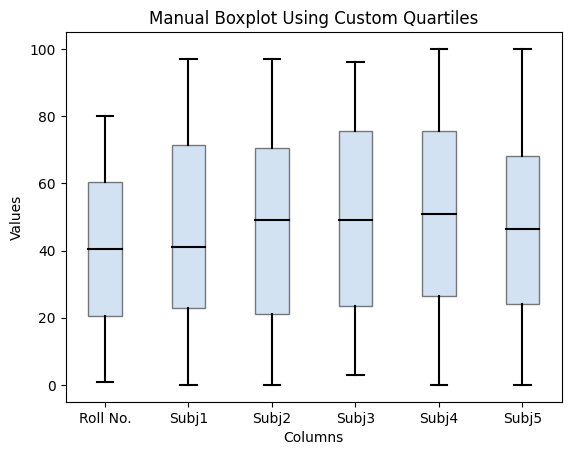

In [10]:
# import matplotlib.pyplot as plt
#
# plt.figure()
# plt.boxplot([df[col].dropna() for col in df.columns])
# plt.xticks(range(1, len(df.columns) + 1), df.columns)
# plt.xlabel("Columns")
# plt.ylabel("Values")
# plt.title("Boxplot of DataFrame Columns")
# plt.show()

import matplotlib.pyplot as plt
import matplotlib.patches as patches

q = quartiles(df)

plt.figure()

positions = range(1, len(df.columns) + 1)

for pos, col in zip(positions, df.columns):
    Q1, Q2, Q3 = q[col]
    data = df[col].dropna()
    
    min_val = min(data)
    max_val = max(data)
    
    # Draw box (Q1 to Q3)
    box = patches.Rectangle(
        (pos - 0.2, Q1),
        0.4,
        Q3 - Q1,
        facecolor="#A7C7E7",   # pastel blue
        edgecolor="black",
        alpha=0.5              # 50% transparency
    )
    plt.gca().add_patch(box)
    
    # Median line
    plt.plot([pos - 0.2, pos + 0.2], [Q2, Q2], color="black")
    
    # Whiskers
    plt.plot([pos, pos], [min_val, Q1], color="black")
    plt.plot([pos, pos], [Q3, max_val], color="black")
    
    # Whisker caps
    plt.plot([pos - 0.1, pos + 0.1], [min_val, min_val], color="black")
    plt.plot([pos - 0.1, pos + 0.1], [max_val, max_val], color="black")

plt.xticks(positions, df.columns)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Manual Boxplot Using Custom Quartiles")

plt.show()